In [10]:
import os
import tensorflow as tf
tf.keras.Model.save_weights
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt

In [3]:
from keras.preprocessing.image import ImageDataGenerator

# create a new generator
imagegen = ImageDataGenerator()
# load train data
train = imagegen.flow_from_directory("C:/Users/Dell/scraping_image_data/training_images", class_mode="categorical", shuffle=False, batch_size=128, target_size=(224, 224))
# load val data
val = imagegen.flow_from_directory("C:/Users/Dell/scraping_image_data/validation_images", class_mode="categorical", shuffle=False, batch_size=128, target_size=(224, 224))

Found 2493 images belonging to 3 classes.
Found 84 images belonging to 3 classes.


In [4]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, InputLayer, BatchNormalization, Dropout

# build a sequential model
model = Sequential()
model.add(InputLayer(input_shape=(224, 224, 3)))

# 1st conv block
model.add(Conv2D(25, (5, 5), activation='relu', strides=(1, 1), padding='same'))
model.add(MaxPool2D(pool_size=(2, 2), padding='same'))
# 2nd conv block
model.add(Conv2D(50, (5, 5), activation='relu', strides=(2, 2), padding='same'))
model.add(MaxPool2D(pool_size=(2, 2), padding='same'))
model.add(BatchNormalization())
# 3rd conv block
model.add(Conv2D(70, (3, 3), activation='relu', strides=(2, 2), padding='same'))
model.add(MaxPool2D(pool_size=(2, 2), padding='valid'))
model.add(BatchNormalization())
# ANN block
model.add(Flatten())
model.add(Dense(units=100, activation='relu'))
model.add(Dense(units=100, activation='relu'))
model.add(Dropout(0.25))
# output layer
model.add(Dense(units=3, activation='softmax'))

In [5]:
# compile model
model.compile(loss='categorical_crossentropy', optimizer="Adam", metrics=['accuracy'])
#checkpoints
checkpoint = ModelCheckpoint(filepath=r'C:\Users\Dell\.keras\models\OPTIMIZERS\ADAM.h5')
# fit on data for 20 epochs
model.fit_generator(train, epochs=20, validation_data=val)

Epoch 1/20
20/20 [==============================] - 235s 12s/step - loss: 1.5865 - accuracy: 0.4296 - val_loss: 10.4478 - val_accuracy: 0.3452
Epoch 2/20
20/20 [==============================] - 213s 11s/step - loss: 1.1944 - accuracy: 0.4902 - val_loss: 1.6435 - val_accuracy: 0.3571
Epoch 3/20
20/20 [==============================] - 214s 11s/step - loss: 1.1070 - accuracy: 0.4573 - val_loss: 1.4560 - val_accuracy: 0.4405
Epoch 4/20
20/20 [==============================] - 214s 11s/step - loss: 0.7925 - accuracy: 0.6490 - val_loss: 2.3111 - val_accuracy: 0.3929
Epoch 5/20
20/20 [==============================] - 214s 11s/step - loss: 0.6751 - accuracy: 0.6847 - val_loss: 5.1783 - val_accuracy: 0.3452
Epoch 6/20
20/20 [==============================] - 226s 11s/step - loss: 0.5535 - accuracy: 0.7497 - val_loss: 2.6074 - val_accuracy: 0.3810
Epoch 7/20
20/20 [==============================] - 212s 11s/step - loss: 0.4353 - accuracy: 0.8095 - val_loss: 2.7005 - val_accuracy: 0.4048
Epoch

In [6]:
from keras.applications import VGG16

# include top should be False to remove the softmax layer
pretrained_model = VGG16(include_top=False, weights='imagenet')
pretrained_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, None, None, 3)     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0     

Test loss: 1.1627928018569946
Test accuracy: 0.761904776096344


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


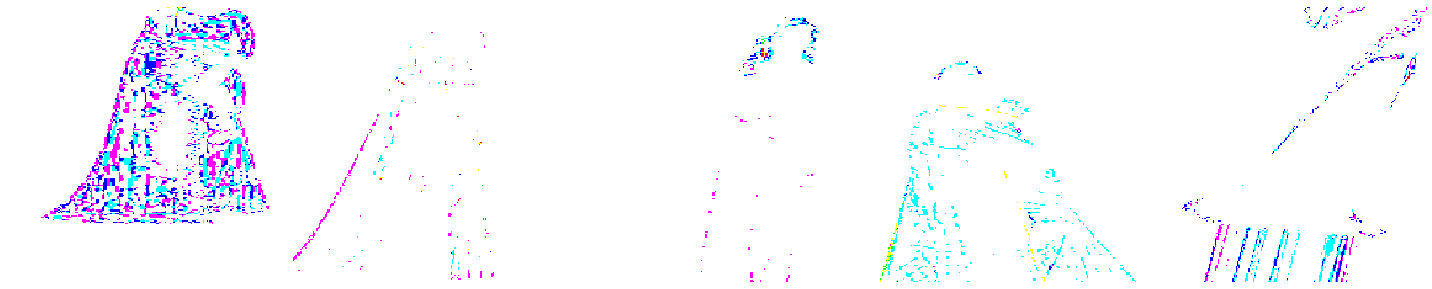

In [12]:
#Check the Evaluation
test_eval = model.evaluate(val, verbose=0)

#Print Results
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

sample_training_images, _ = next(train)

#Defining Plots
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()
#Ploting Results    
plotImages(sample_training_images[:5])
